In [17]:
import sys, os
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm
import torch
import matplotlib.pyplot as plt
import h5py

In [2]:
sys.path.append("../../..")

In [23]:
from source.NAHEA import NAHEA_nFeatures_BinClass_1
from source.trainer import undersample

In [4]:
model_path = Path("model.json")
model = NAHEA_nFeatures_BinClass_1.from_file(model_path)

In [5]:
model.name

'test_model_2features'

In [9]:
data_path = Path("../../../data/circle/test.h5")

In [37]:
def setup_test_data_loader(config):
    n_load = config["n_load_test"]
    with h5py.File(config["filename_test"], "r") as f:
        X_test: np.ndarray = f["X"][:n_load]  # type: ignore
        y_test: np.ndarray = f["y"][:n_load]  # type: ignore

    small_size = config["small_size_test"]
    test_kwargs = config["test_kwargs"]
    # only take items where y is 1 or 5
    X_test = torch.tensor(X_test, dtype=torch.double)[:, : config["pca_components"]]
    y_test = torch.tensor(y_test, dtype=torch.double)
    X_test, y_test = undersample(X_test, y_test)

    X_test = X_test[:small_size]
    y_test = y_test[:small_size]

    # normalize the data to 0-1 range
    X_test = (X_test - X_test.min(axis=0, keepdims=True)[0]) / (
        X_test.max(axis=0, keepdims=True)[0] - X_test.min(axis=0, keepdims=True)[0]
    )

    dataset = torch.utils.data.TensorDataset(X_test, y_test)
    dataloader = torch.utils.data.DataLoader(dataset, **test_kwargs)

    return {
        "test_loader": dataloader,
    }

In [38]:
sampling_rate = 0.4
test_kwargs = {
    "batch_size": 16,
    "num_workers": 1,
    "pin_memory": False,
    "drop_last": False,
}

test_config = {
    "filename_train": None,
    "filename_test": data_path,
    "data_save_file": Path("generated_data")
    / "2_pca_components"
    / "NAHEA_nFeatures_BinClass_1_1"
    / "output_test.csv",
    "test_kwargs": test_kwargs,
    "sampling_rate": sampling_rate,
    "n_load_test": None,
    "pca_components": 2,
    "small_size_test": 1024,
} 

test_loader = setup_test_data_loader(test_config)["test_loader"]

In [39]:
model.eval()
out = []
for batch in tqdm(test_loader, total=len(test_loader), desc="Total", position=0):
    x, y = batch
    x = x.numpy()
    y = y.numpy()

    batch_out = []
    for x_i, y_i in tqdm(zip(x, y), total=len(x), desc="Batch", position=1, leave=False):
        with torch.no_grad():
            pred = model(x_i)["output"]
        batch_out.append(
            {
                "x": x_i,
                "y": y_i,
                "pred": pred,
            }
        )
    batch_out = np.array(batch_out, dtype=object)
    out.append(batch_out)
out = np.concatenate(out, axis=0)

out = {"x": np.array([d["x"] for d in out]),
       "y": np.array([d["y"] for d in out]),
       "pred": np.array([d["pred"] for d in out])}

Total:   0%|          | 0/64 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

Batch:   0%|          | 0/16 [00:00<?, ?it/s]

In [40]:
threshold = 0.5
pred_classes = (out["pred"] > threshold).astype(int)
y_true = out["y"]
accuracy = np.mean(pred_classes == y_true)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7686


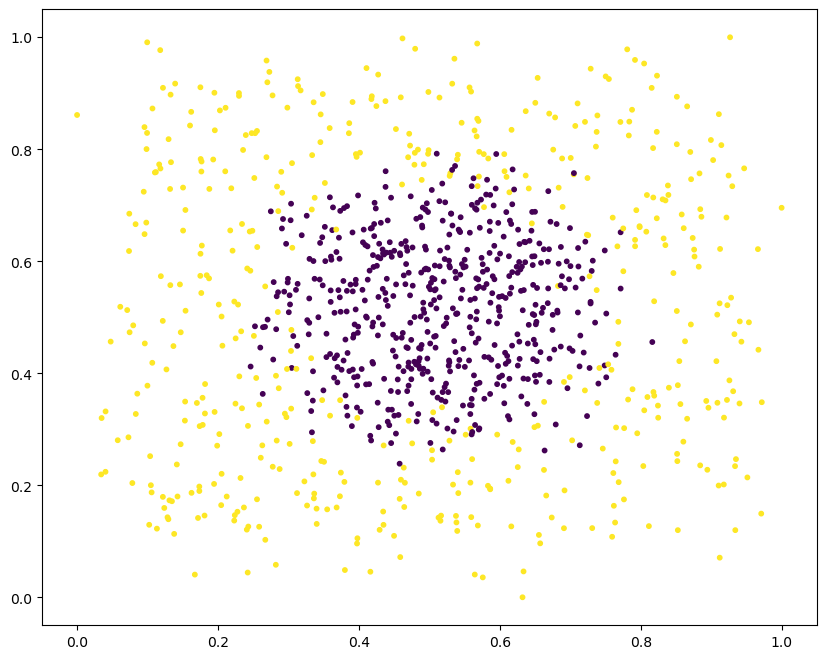

In [44]:
# plot x, y and true class
x = out["x"]
y = out["y"]
pred_classes = out["pred"]
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="viridis", s=10, label="True Class")
# plt.scatter(x[:, 0], x[:, 1], c=pred_classes, cmap="coolwarm", s=10, alpha=0.5, label="Predicted Class")
plt.show()

/tmp/ipykernel_1023857/300469411.py:10: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in contours.collections:


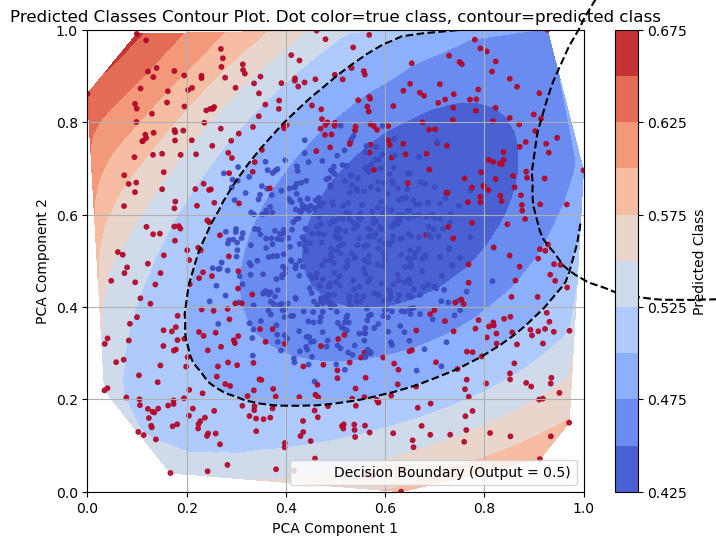

In [49]:
# plot a contour plot of the predictions
x = out["x"]
y = out["y"]
class_pred = out["pred"]
x1 = x[:, 0]
x2 = x[:, 1]
plt.figure(figsize=(8, 6))
# decision boundary
contours = plt.tricontour(x1, x2, class_pred, levels=[0.5], colors='black', linewidths=1.5)
for c in contours.collections:
    c.set_linestyle('dashed')
    c.set_linewidth(1.5)
    c.set_label('Decision Boundary (Output = 0.5)')
plt.tricontourf(x1, x2, class_pred, levels=10, cmap="coolwarm", alpha=1.0)
plt.colorbar(label="Predicted Class")
plt.scatter(x1, x2, c=y==1, cmap="coolwarm", alpha=0.9, s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Predicted Classes Contour Plot. Dot color=true class, contour=predicted class")
plt.legend()
plt.grid()
plt.show()

In [46]:
# run the model on a grid of points in the PCA space
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0
n_grid = 20
x_grid = np.linspace(x_min, x_max, n_grid)
y_grid = np.linspace(y_min, y_max, n_grid)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
import time


out_grid = []
print("Running model on grid of points...")
for x, y in tqdm(zip(X_grid.flatten(), Y_grid.flatten()), total=n_grid**2, desc="Grid Points", position=0):
    with torch.no_grad():
        pred = model(torch.tensor([x, y]).float())["output"]
    out_grid.append(
        {
            "x": np.array([x]),
            "y": np.array([y]),
            "pred": pred.numpy(),
        }
    )
out_grid = np.array(out_grid, dtype=object)
out_grid = {"x": np.array([d["x"] for d in out_grid]),
       "y": np.array([d["y"] for d in out_grid]),
       "pred": np.array([d["pred"] for d in out_grid])}

Running model on grid of points...


Grid Points:   0%|          | 0/400 [00:00<?, ?it/s]

/tmp/ipykernel_1023857/2716204726.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in contours.collections:


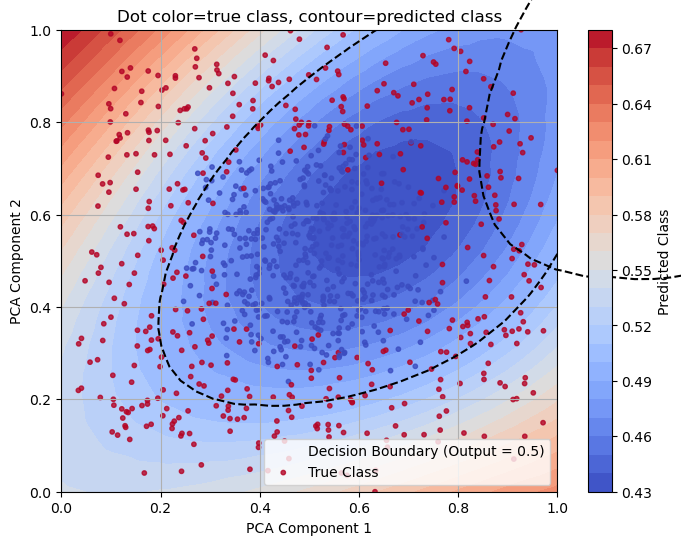

In [50]:
# contour plot of the predictions on the grid
x1 = out_grid["x"].flatten()
x2 = out_grid["y"].flatten()
class_pred = out_grid["pred"]
plt.figure(figsize=(8, 6))
# decision boundary
contours = plt.tricontour(x1, x2, class_pred, levels=[0.5], colors='black', linewidths=1.5)
for c in contours.collections:
    c.set_linestyle('dashed')
    c.set_linewidth(1.5)
    c.set_label('Decision Boundary (Output = 0.5)')
plt.tricontourf(x1, x2, class_pred, levels=25, cmap
="coolwarm", alpha=1.0)
plt.colorbar(label="Predicted Class")
# add true class points
plt.scatter(out["x"][:, 0], out["x"][:, 1], c=out["y"], cmap="coolwarm", alpha=0.8, s=10, label='True Class')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Dot color=true class, contour=predicted class")
plt.legend()
plt.grid()
plt.show()